In [1]:
from sklearn.neighbors import KNeighborsClassifier
!gdown 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

Downloading...
From: https://drive.google.com/uc?id=1zOj808OstnkaWlltM4qKNjjT3iT3yeMN
To: O:\Git\AIO-2024\src\module3\final\cleveland.csv

  0%|          | 0.00/10.9k [00:00<?, ?B/s]
100%|##########| 10.9k/10.9k [00:00<?, ?B/s]


In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Bai tap 1
df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Bài tập 1: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi và khả năng bị bệnh tim. Ở đây, target = 1 ngụ ý rằng người đó đang bị bệnh tim và target = 0 ngụ ý rằng người đó không bị bệnh tim. Hình 3 thể hiện kết quả sau khi thực hiện đoạn code visualization bên dưới:

In [31]:
df_first_plt = df[['age', 'target']].groupby(['age', 'target']).size().reset_index(name = 'count')
df_first_plt.head(20)

,age,target,count
0,29,0,1
1,34,0,2
2,35,0,2
3,35,1,2
4,37,0,2
5,38,0,1
6,38,1,1
7,39,0,3
8,39,1,1
9,40,0,1


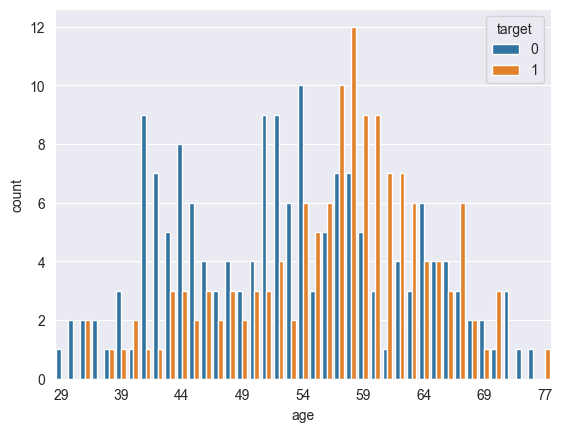

In [32]:
from matplotlib.ticker import MaxNLocator

# distribution of target vs age
# Your code here *******************************
sns.barplot(df_first_plt, x = "age", y = "count", hue = "target")
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins = 10))
plt.show()

Bài tập 2: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim. Hình 4 thể hiện kết quả sau khi thực hiện đoạn code visualization bên dưới:

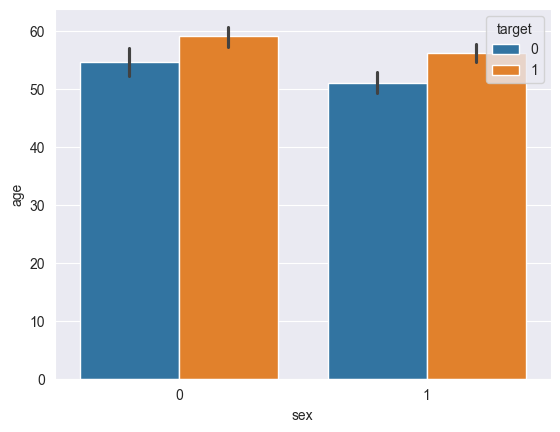

In [33]:
sns.barplot(df, x = "sex", y = "age", hue = "target")
plt.show()

Bài tập 3: (sử dụng KNN cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật KNN để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'

In [36]:
# bai tap 3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# your code here ***************************
knn_model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2,
                                 metric = 'minkowski')

knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [42]:
y_pred_test = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
y_true = y_test
cm_test = confusion_matrix(y_true, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test, cm_train

(array([[22,  7],
        [12, 20]], dtype=int64),
 array([[107,  28],
        [ 31,  76]], dtype=int64))

In [43]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {} '.format(
	accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {} '.format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76 
Accuracy for test set for KNeighborsClassifier = 0.69 


Bài tập 4: (sử dụng SVM cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật SVM để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = 'rbf', random_state=42

In [44]:
# bai tap 4
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

svm_model = SVC(kernel = 'rbf', random_state = 42)
svm_model.fit(X_train, y_train)



SVC(random_state=42)

In [45]:

# your code here ***************************

accuracy_for_train = svm_model.score(X_train, y_train)
accuracy_for_test = svm_model.score(X_test, y_test)
print('Accuracy for training set for SVM = {} '.format(accuracy_for_train))
print('Accuracy for test set for SVM = {} '.format(accuracy_for_test))

Accuracy for training set for SVM = 0.6611570247933884 
Accuracy for test set for SVM = 0.6721311475409836 


Bài tập 5: (sử dụng Naive Bayes cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Naive Bayes để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = 'rbf', random_state=42

In [46]:
# bai tap 5
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# your code here ***************************

gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)

accuracy_for_train = gaussian_model.score(X_train, y_train)
accuracy_for_test = gaussian_model.score(X_test, y_test)

print('Accuracy for training set for Naive Bayes = {} '.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {} '.format(accuracy_for_test))

Accuracy for training set for Naive Bayes = 0.8471074380165289 
Accuracy for test set for Naive Bayes = 0.8360655737704918 


Bài tập 6: (sử dụng Decision Tree cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Decision Tree để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: criterion='gini', max_depth=10, min_samples_split=2

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# your code here ***************************
random_forest_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 2)

random_forest_model.fit(X_train, y_train)

accuracy_for_train = random_forest_model.score(X_train, y_train)
accuracy_for_test = random_forest_model.score(X_test, y_test)

print('Accuracy for training set for Decision Tree = {} '.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {} '.format(accuracy_for_test))

Accuracy for training set for Decision Tree = 1.0 
Accuracy for test set for Decision Tree = 0.7540983606557377 


Bài tập 7: (sử dụng Random Forest cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Random Forest để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# your code here ***************************
random_forest_model = RandomForestClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 2,
                                             n_estimators = 10, random_state = 42)

random_forest_model.fit(X_train, y_train)

accuracy_for_train = random_forest_model.score(X_train, y_train)
accuracy_for_test = random_forest_model.score(X_test, y_test)

print('Accuracy for training set for Random Forest = {} '.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {} '.format(accuracy_for_test))

Accuracy for training set for Decision Tree = 0.9834710743801653 
Accuracy for test set for Decision Tree = 0.8032786885245902 


Bài tập 8: (sử dụng Adaboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng
giải thuật Adaboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau:
n_estimators=50, learning_rate=1.0

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# your code here ***************************
random_forest_model = AdaBoostClassifier(n_estimators = 50, learning_rate = 1.0)

random_forest_model.fit(X_train, y_train)

accuracy_for_train = random_forest_model.score(X_train, y_train)
accuracy_for_test = random_forest_model.score(X_test, y_test)

print('Accuracy for training set for Decision Tree = {} '.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {} '.format(accuracy_for_test))

Accuracy for training set for Decision Tree = 0.9132231404958677 
Accuracy for test set for Decision Tree = 0.8360655737704918 


C:\Users\Khoaddow\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Bài tập 9: (sử dụng GradientBoost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử
dụng giải thuật GradientBoost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham
số sau: learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,
random_state=42

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# your code here ***************************
xgboost_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,
                                           random_state=42)

xgboost_model.fit(X_train, y_train)

accuracy_for_train = xgboost_model.score(X_train, y_train)
accuracy_for_test = xgboost_model.score(X_test, y_test)

print('Accuracy for training set for GradientBoost = {} '.format(accuracy_for_train))
print('Accuracy for test set for GradientBoost = {} '.format(accuracy_for_test))

Accuracy for training set for GradientBoost = 0.9958677685950413 
Accuracy for test set for GradientBoost = 0.8524590163934426 


Bài tập 10: (sử dụng XGboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng
giải thuật XGboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau:
objective="binary:logistic", random_state=42, n_estimators = 100

In [55]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# your code here ***************************
xgboost_model = xgb.XGBRegressor(objective = "binary:logistic", random_state = 42, n_estimators = 100)

xgboost_model.fit(X_train, y_train)

accuracy_for_train = xgboost_model.score(X_train, y_train)
accuracy_for_test = xgboost_model.score(X_test, y_test)

print('Accuracy for training set for XGBoost = {} '.format(accuracy_for_train))
print('Accuracy for test set for XGBoost = {} '.format(accuracy_for_test))

Accuracy for training set for XGBoost = 0.9928653240203857 
Accuracy for test set for XGBoost = 0.5601751804351807 


Bài tập 11: (sử dụng kỷ thuật Stacking cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử
dụng kỹ thuật Stacking để dự đoán bệnh nhân có khả bị bệnh tim hay bằng cách dùng phương pháp
stacking sử dụng heterogeneous approach với mô hình giải thuật được thể hiện ở hình 1.

In [53]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# your code here ***************************
dtc = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state = 42)
svc = SVC(kernel = 'rbf', random_state = 42)
ad = AdaBoostClassifier(random_state = 42)

estimators = [
    ('dtc',dtc),
    ('rfc',rfc),
    ('knn',knn),
    ('xgb',xgb),
    ('gc',gc),
    ('svc',svc),
    ('ad',ad),    
]
clf = StackingClassifier(
    estimators=estimators, 
)

clf.fit(X_train, y_train)


accuracy_for_train = clf.score(X_train, y_train)
accuracy_for_test = clf.score(X_test, y_test)

print('Accuracy for training set for Stacking = {} '.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {} '.format(accuracy_for_test))

C:\Users\Khoaddow\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Khoaddow\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Khoaddow\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Khoaddow\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the 

Accuracy for training set for Stacking = 1.0 
Accuracy for test set for Stacking = 0.8852459016393442 
